In [2]:
from my_utils import loader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import importlib
import numpy as np
importlib.reload(loader)

<module 'my_utils.loader' from '/workspaces/Thesis/Gaze_4_behavioural_biometrics/my_utils/loader.py'>

In [3]:
import warnings;
warnings.filterwarnings('ignore');

[analisi](https://goldinlocks.github.io/Bayesian-logistic-regression-with-pymc3/)

In [5]:
def get_df_features(features_train, features_test, labels_train, labels_test, fix= True):
    if fix:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "dur",
                "pupil_diam_left",
                "pupil_diam_right"
        ]
    else:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "angle",
                "ampl",
                "dur",
                "pupil_diam_left",
                "pupil_diam_right"
        ]
    features_train = pd.DataFrame(features_train)
    features_train.columns = features
    features_train["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_train]
    features_test = pd.DataFrame(features_test)
    features_test.columns = features
    features_test["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_test]
    return features_train.append(features_test)


In [7]:
def plot_correlations(df):
    n_fts = len(df.columns)
    colors = cm.rainbow(np.linspace(0, 1, n_fts))
    df.drop('empathy',axis=1).corrwith(df.empathy).sort_values(ascending=True).plot(kind='barh', color=colors, figsize=(10, 4))
    plt.title('Correlation to Target (empathy)')
    plt.show()
    print('\n',df.drop('empathy',axis=1).corrwith(df.empathy).sort_values(ascending=False))

In [8]:
def plot_class_frequencies(df):
    total = len(df)
    plt.figure(figsize=(7,5))
    g = sns.countplot(x='empathy', data=df)
    g.set_ylabel('Count', fontsize=14)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 1.5,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14, fontweight='bold')
    plt.margins(y=0.1)
    plt.show()

## __Free Viewing__

### __General empathy__

#### __Fixations__

In [42]:
free_fix_features_train, free_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
free_fix_features_test, free_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_fix_features_df = get_df_features(free_fix_features_train, free_fix_features_test, free_fix_labels_train, free_fix_labels_test)
free_fix_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


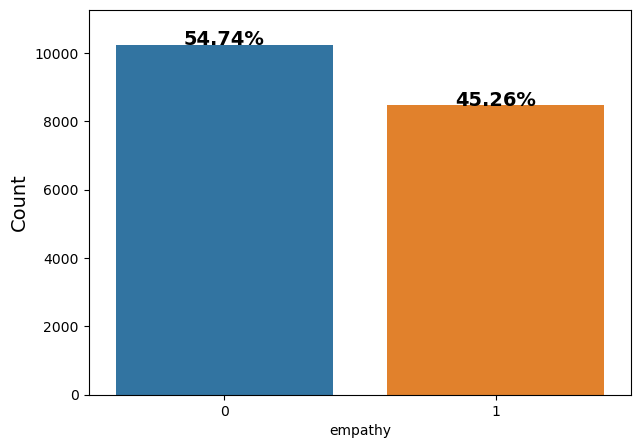

In [ ]:
plot_class_frequencies(free_fix_features_df)

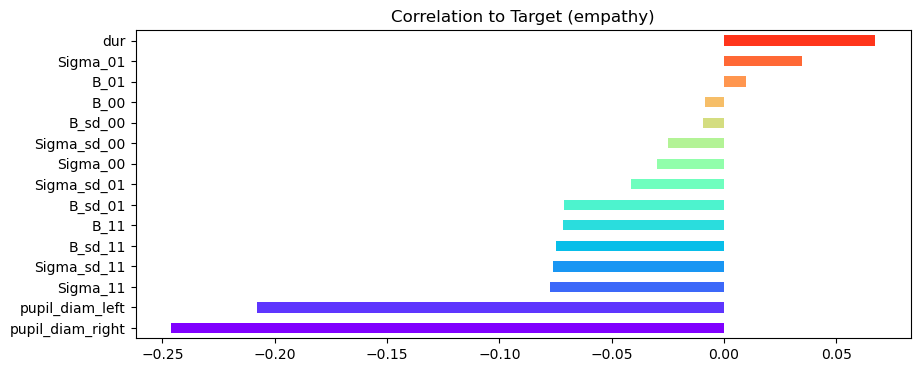


 dur                 0.067345
Sigma_01            0.034751
B_01                0.009718
B_00               -0.008456
B_sd_00            -0.009238
Sigma_sd_00        -0.024860
Sigma_00           -0.029978
Sigma_sd_01        -0.041235
B_sd_01            -0.071410
B_11               -0.071669
B_sd_11            -0.074842
Sigma_sd_11        -0.076110
Sigma_11           -0.077330
pupil_diam_left    -0.207873
pupil_diam_right   -0.246281
dtype: float64


In [43]:
plot_correlations(free_fix_features_df)

#### __Saccades__

In [44]:
_, _, free_sac_features_train, free_sac_labels_train = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
_, _, free_sac_features_test, free_sac_labels_test = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_sac_features_df = get_df_features(free_sac_features_train, free_sac_features_test, free_sac_labels_train, free_sac_labels_test, fix=False)
free_sac_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.267404,-0.062063,0.393935,0.221068,0.151942,0.334570,19043.765563,587.397127,28616.579086,11211.996583,330.729936,15666.190783,32.005383,66.037868,0.033333,3.750,3.550,1
1,4.038522,-3.252532,3.288455,1.096619,0.876793,1.418526,22345.768371,-628.266373,38460.514960,10108.553184,317.633896,17682.699687,-21.072727,116.811814,0.041667,3.590,3.720,1
2,0.977165,0.947107,3.275761,0.205921,0.259758,1.061665,1168.263115,93.573391,11337.827852,777.609148,84.195021,6031.143676,-153.239401,131.034347,0.050000,3.555,3.540,1
3,1.461892,1.101030,3.730387,0.597207,0.425156,1.521754,31678.815782,532.524847,19891.663734,14469.355813,351.189790,9287.743565,-146.633634,196.367003,0.083333,3.325,3.435,1
4,0.486348,-2.011505,10.964955,0.235941,0.593969,3.164296,50535.142650,-700.083689,8330.121751,18390.111825,230.441191,4819.837024,98.759701,321.753011,0.041667,3.385,3.260,1


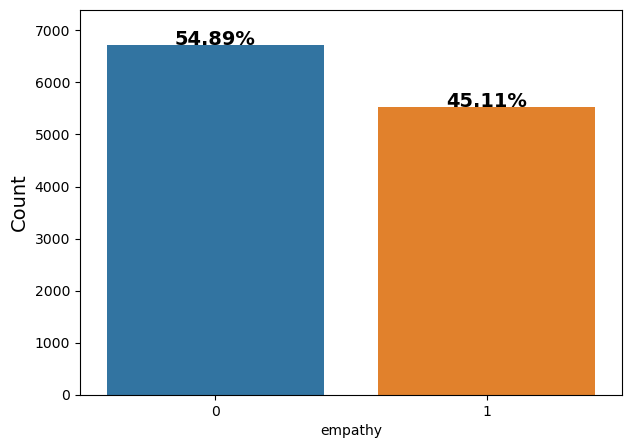

In [45]:
plot_class_frequencies(free_sac_features_df)

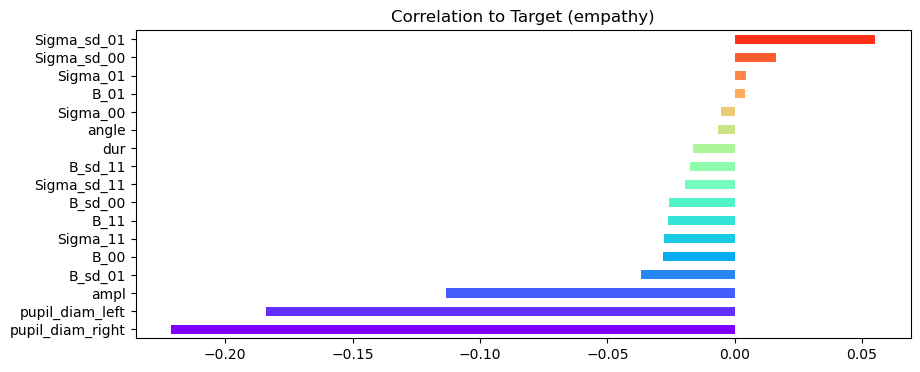


 Sigma_sd_01         0.055212
Sigma_sd_00         0.016340
Sigma_01            0.004290
B_01                0.003889
Sigma_00           -0.005331
angle              -0.006568
dur                -0.016221
B_sd_11            -0.017675
Sigma_sd_11        -0.019433
B_sd_00            -0.025765
B_11               -0.026230
Sigma_11           -0.027767
B_00               -0.028126
B_sd_01            -0.036673
ampl               -0.113241
pupil_diam_left    -0.184017
pupil_diam_right   -0.221346
dtype: float64


In [46]:
plot_correlations(free_sac_features_df)

### __Cognitive empathy__

#### __Fixations__

In [48]:
free_fix_features_cog_train, free_fix_labels_cog_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
free_fix_features_cog_test, free_fix_labels_cog_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_fix_features_cog_df = get_df_features(free_fix_features_cog_train, free_fix_features_cog_test, free_fix_labels_cog_train, free_fix_labels_cog_test)
free_fix_features_cog_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


In [49]:
sub = free_fix_features_df.subtract(free_fix_features_cog_df)
high_general_low_cog = sub[sub.empathy == -1].index
low_general_high_cog = sub[sub.empathy == 1].index
compare = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[high_general_low_cog].mean(axis=0)).rename(columns = {"self": "general mean", "other":"high general low cog"})[:-1]
compare["low general high cog"] = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[low_general_high_cog].mean(axis=0)).rename(columns = {"self": "general mean", "other":"low general high cog"})[:-1]["low general high cog"]
compare

,general mean,high general low cog,low general high cog
B_00,0.450365,0.275373,0.543587
B_01,-0.128665,-0.125287,-0.171816
B_11,2.136713,1.890827,1.863527
B_sd_00,0.187737,0.206258,0.172521
B_sd_01,0.177892,0.184338,0.173567
B_sd_11,1.505563,1.370592,1.261882
Sigma_00,6536.124764,7586.074797,4665.503395
Sigma_01,-35.897492,24.114675,-29.489406
Sigma_11,12163.987099,13098.224921,13485.749865
Sigma_sd_00,2899.213032,3351.447810,2085.899569


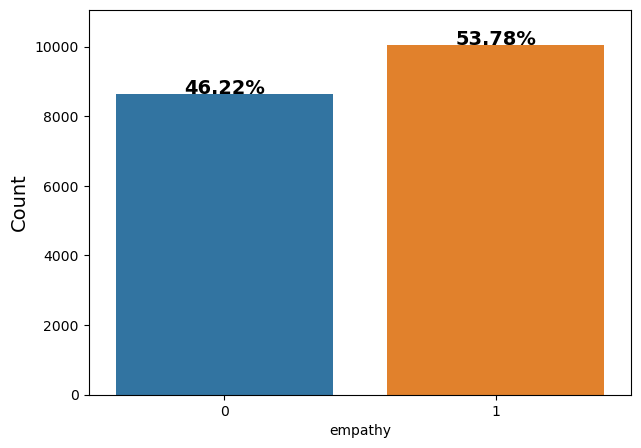

In [50]:
plot_class_frequencies(free_fix_features_cog_df)

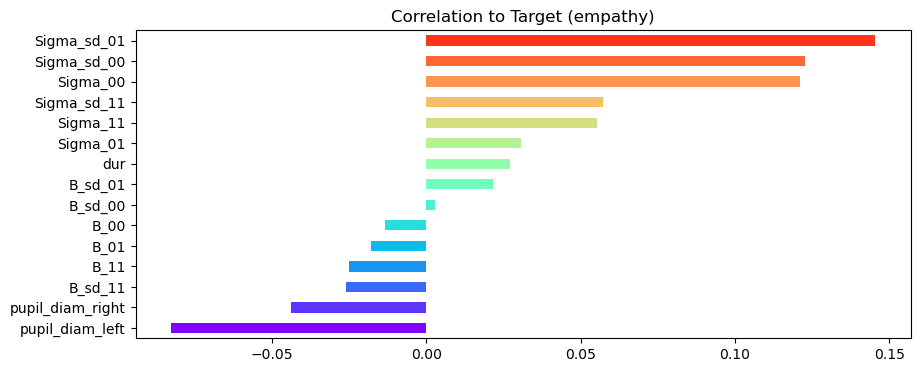


 Sigma_sd_01         0.145436
Sigma_sd_00         0.122787
Sigma_00            0.120989
Sigma_sd_11         0.057102
Sigma_11            0.055155
Sigma_01            0.030748
dur                 0.027219
B_sd_01             0.021583
B_sd_00             0.002791
B_00               -0.013272
B_01               -0.017794
B_11               -0.025029
B_sd_11            -0.025813
pupil_diam_right   -0.043932
pupil_diam_left    -0.082692
dtype: float64


In [51]:
plot_correlations(free_fix_features_cog_df)

#### __Saccades__

In [52]:
_, _ , free_sac_features_cog_train, free_sac_labels_cog_train = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
_, _, free_sac_features_cog_test, free_sac_labels_cog_test  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_sac_features_cog_df = get_df_features(free_sac_features_cog_train, free_sac_features_cog_test, free_sac_labels_cog_train, free_sac_labels_cog_test, fix= False)
free_sac_features_cog_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.267404,-0.062063,0.393935,0.221068,0.151942,0.334570,19043.765563,587.397127,28616.579086,11211.996583,330.729936,15666.190783,32.005383,66.037868,0.033333,3.750,3.550,1
1,4.038522,-3.252532,3.288455,1.096619,0.876793,1.418526,22345.768371,-628.266373,38460.514960,10108.553184,317.633896,17682.699687,-21.072727,116.811814,0.041667,3.590,3.720,1
2,0.977165,0.947107,3.275761,0.205921,0.259758,1.061665,1168.263115,93.573391,11337.827852,777.609148,84.195021,6031.143676,-153.239401,131.034347,0.050000,3.555,3.540,1
3,1.461892,1.101030,3.730387,0.597207,0.425156,1.521754,31678.815782,532.524847,19891.663734,14469.355813,351.189790,9287.743565,-146.633634,196.367003,0.083333,3.325,3.435,1
4,0.486348,-2.011505,10.964955,0.235941,0.593969,3.164296,50535.142650,-700.083689,8330.121751,18390.111825,230.441191,4819.837024,98.759701,321.753011,0.041667,3.385,3.260,1


In [53]:
sub = free_sac_features_df.subtract(free_sac_features_cog_df)
high_general_low_cog = sub[sub.empathy == -1].index
low_general_high_cog = sub[sub.empathy == 1].index
compare = free_sac_features_df.mean(axis=0).compare(free_sac_features_df.iloc[high_general_low_cog].mean(axis=0)).rename(columns = {"self": "general mean", "other":"high general low cog"})[:-1]
compare["low general high cog"] = free_sac_features_df.mean(axis=0).compare(free_sac_features_df.iloc[low_general_high_cog].mean(axis=0)).rename(columns = {"self": "general mean", "other":"low general high cog"})[:-1]["low general high cog"]
compare

,general mean,high general low cog,low general high cog
B_00,3.220528,3.566962,3.368813
B_01,-0.854468,-0.877896,-0.782170
B_11,7.394905,6.475491,6.724990
B_sd_00,1.099704,1.278069,1.079315
B_sd_01,0.643253,0.649891,0.591706
B_sd_11,3.732392,3.083609,3.349719
Sigma_00,25047.991114,25379.525875,25253.061783
Sigma_01,43.830810,69.721468,30.227297
Sigma_11,24713.810881,26055.670628,22643.373160
Sigma_sd_00,10406.907307,10347.625073,10294.341106


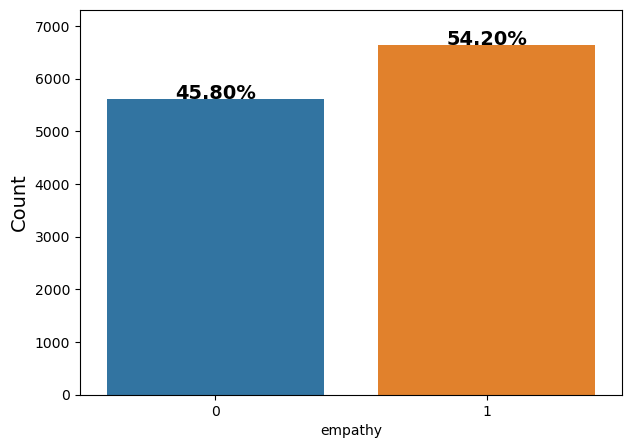

In [55]:
plot_class_frequencies(free_sac_features_cog_df)

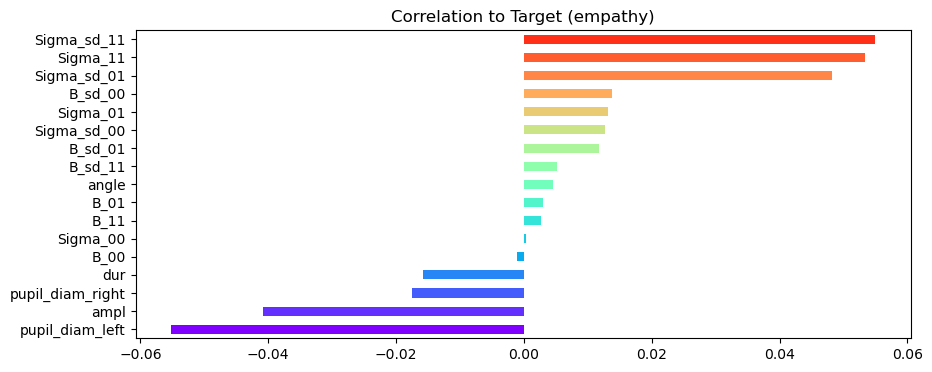


 Sigma_sd_11         0.054980
Sigma_11            0.053305
Sigma_sd_01         0.048245
B_sd_00             0.013770
Sigma_01            0.013214
Sigma_sd_00         0.012631
B_sd_01             0.011801
B_sd_11             0.005120
angle               0.004566
B_01                0.002956
B_11                0.002724
Sigma_00            0.000384
B_00               -0.001066
dur                -0.015806
pupil_diam_right   -0.017504
ampl               -0.040801
pupil_diam_left    -0.055245
dtype: float64


In [56]:
plot_correlations(free_sac_features_cog_df)

### __Affective empathy__

#### __Fixations__

In [65]:
free_fix_features_aff_train, free_fix_labels_aff_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", type="affective", normalize=False)
free_fix_features_aff_test, free_fix_labels_aff_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", type= "affective", normalize=False)
free_fix_features_aff_df = get_df_features(free_fix_features_aff_train, free_fix_features_aff_test, free_fix_labels_aff_train, free_fix_labels_aff_test)
free_fix_features_aff_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


In [66]:
sub = free_fix_features_df.subtract(free_fix_features_aff_df)
high_general_low_aff = sub[sub.empathy == -1].index
low_general_high_aff = sub[sub.empathy == 1].index
compare = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[high_general_low_aff].mean(axis=0)).rename(columns = {"self": "general mean", "other":"high general low aff"})[:-1]
compare["low general high aff"] = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[low_general_high_aff].mean(axis=0)).rename(columns = {"self": "general mean", "other":"low general high aff"})[:-1]["low general high aff"]
compare

,general mean,high general low aff,low general high aff
B_00,0.450365,0.817793,0.506774
B_01,-0.128665,-0.093795,-0.084932
B_11,2.136713,3.687963,1.028304
B_sd_00,0.187737,0.210969,0.164430
B_sd_01,0.177892,0.197344,0.126033
B_sd_11,1.505563,2.611861,0.756661
Sigma_00,6536.124764,6639.859914,5104.534508
Sigma_01,-35.897492,-94.147101,-13.866867
Sigma_11,12163.987099,12990.633626,8488.563435
Sigma_sd_00,2899.213032,2888.977454,2294.113991


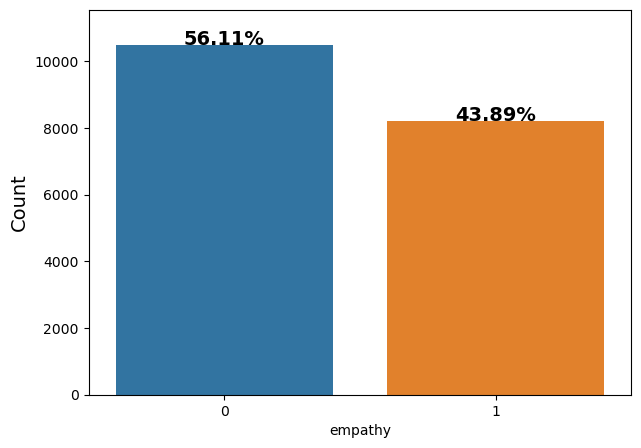

In [67]:
plot_class_frequencies(free_fix_features_aff_df)

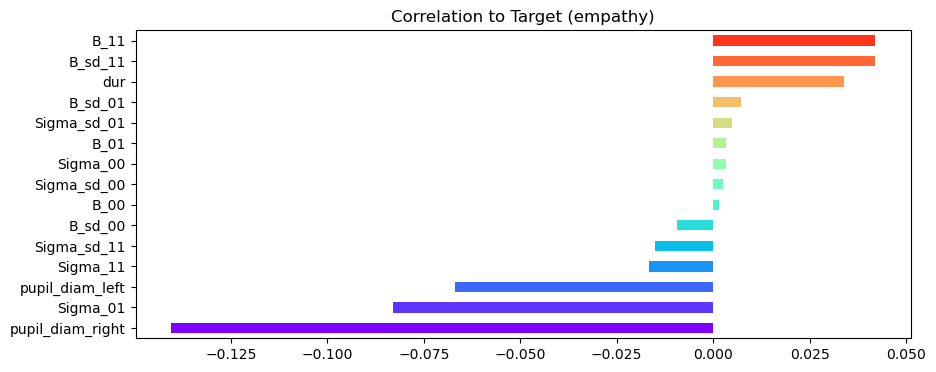


 B_11                0.042024
B_sd_11             0.041908
dur                 0.033926
B_sd_01             0.007122
Sigma_sd_01         0.004779
B_01                0.003400
Sigma_00            0.003392
Sigma_sd_00         0.002608
B_00                0.001534
B_sd_00            -0.009478
Sigma_sd_11        -0.015205
Sigma_11           -0.016660
pupil_diam_left    -0.066992
Sigma_01           -0.082987
pupil_diam_right   -0.140555
dtype: float64


In [68]:
plot_correlations(free_fix_features_aff_df)

#### __Saccades__

## __Task oriented__

### __General empathy__

### __Fixations__

In [57]:
task_fix_features_train, task_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
task_fix_features_test, task_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_fix_features_df = get_df_features(task_fix_features_train, task_fix_features_test, task_fix_labels_train, task_fix_labels_test)
task_fix_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.159111,-0.052830,1.424490,0.129403,0.189595,0.765556,981.338132,-67.893339,2711.174950,423.587804,85.885421,1144.184289,0.200000,3.453750,3.793750,1
1,0.061245,-0.032537,0.159855,0.046204,0.054504,0.130997,2366.154487,-197.724609,1918.878712,936.894501,90.426449,723.415637,0.250000,3.280909,3.444545,1
2,0.035920,-0.038115,0.452530,0.027932,0.066941,0.322537,1897.328271,-31.769430,3045.603990,658.355980,102.106911,1030.794922,0.341667,3.185000,3.335714,1
3,0.166975,-0.014598,0.056437,0.143414,0.043394,0.047483,2316.950504,61.853986,1840.292521,1068.878459,122.467444,806.554623,0.166667,3.114286,3.372857,1
4,0.090304,-0.022923,0.148850,0.078496,0.051161,0.126113,5173.486475,-246.887768,7364.090337,2230.684506,156.425251,3126.183012,0.183333,3.200000,3.441429,1


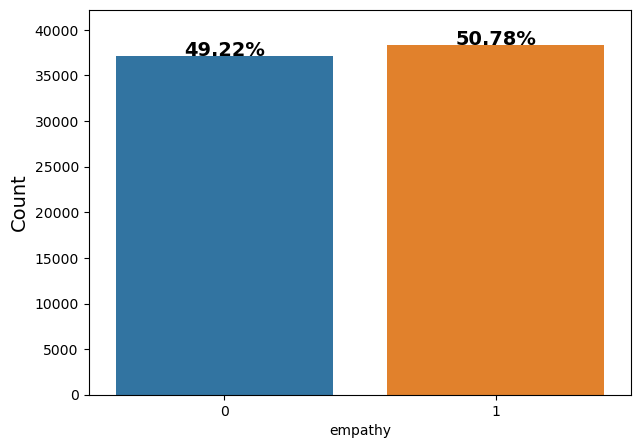

In [59]:
plot_class_frequencies(task_fix_features_df)

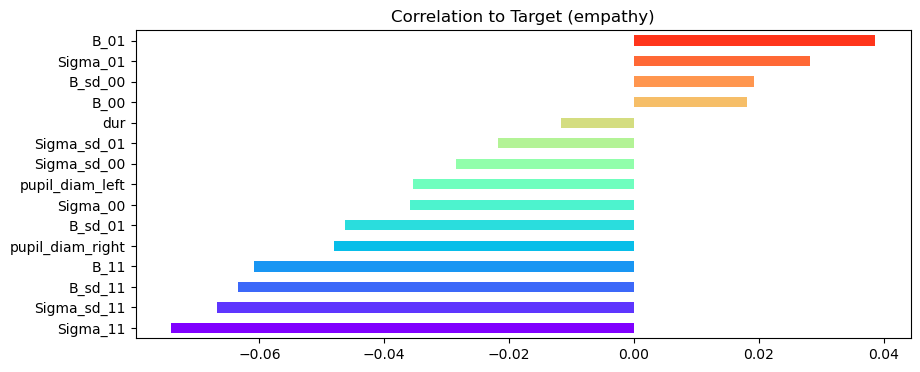


 B_01                0.038692
Sigma_01            0.028150
B_sd_00             0.019212
B_00                0.018135
dur                -0.011616
Sigma_sd_01        -0.021761
Sigma_sd_00        -0.028510
pupil_diam_left    -0.035421
Sigma_00           -0.035838
B_sd_01            -0.046331
pupil_diam_right   -0.047967
B_11               -0.060939
B_sd_11            -0.063436
Sigma_sd_11        -0.066779
Sigma_11           -0.074189
dtype: float64


In [60]:
plot_correlations(task_fix_features_df)

### __Saccades__

In [61]:
_, _, task_sac_features_train, task_sac_labels_train = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
_, _, task_sac_features_test, task_sac_labels_test = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_sac_features_df = get_df_features(task_sac_features_train, task_sac_features_test, task_sac_labels_train, task_sac_labels_test, fix=False)
task_sac_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.354644,-0.306361,0.819852,0.252635,0.264591,0.704853,46034.583421,1003.268085,25493.131000,15578.629101,236.379249,9983.469284,62.414794,477.252554,0.075000,3.406667,3.743333,1
1,0.242181,-0.314134,0.637564,0.130797,0.167587,0.453416,48092.132471,1030.727968,34101.057722,16273.051562,232.794080,12515.215969,61.439605,822.029805,0.083333,3.377500,3.515000,1
2,1.080946,1.765714,6.930785,0.219026,0.361495,2.186966,2473.030467,111.815079,22017.925554,1690.440804,112.553907,9820.981484,-159.405910,176.264007,0.033333,3.260000,3.340000,1
3,13.345232,-3.876324,1.342911,5.288116,1.269643,0.647187,21502.987782,-605.085395,28224.484756,8301.575648,161.048605,10634.802499,-62.359659,857.906755,0.066667,3.240000,3.305000,1
4,0.012309,-0.069197,18.292512,0.009031,0.250405,11.370114,40742.589925,-653.973392,8951.781154,13878.936036,164.163320,3932.621479,129.568784,1053.368407,0.066667,3.336667,3.540000,1


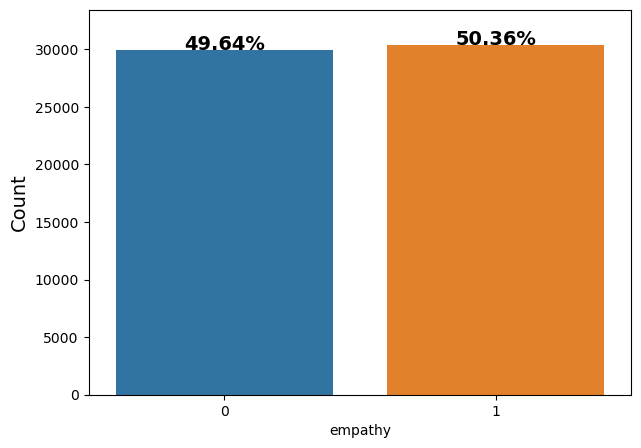

In [62]:
plot_class_frequencies(task_sac_features_df)

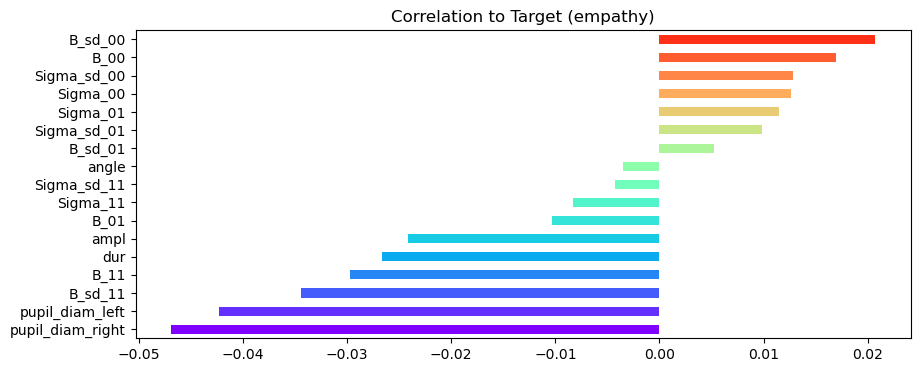


 B_sd_00             0.020743
B_00                0.016971
Sigma_sd_00         0.012853
Sigma_00            0.012676
Sigma_01            0.011510
Sigma_sd_01         0.009850
B_sd_01             0.005209
angle              -0.003472
Sigma_sd_11        -0.004233
Sigma_11           -0.008299
B_01               -0.010361
ampl               -0.024191
dur                -0.026686
B_11               -0.029731
B_sd_11            -0.034455
pupil_diam_left    -0.042341
pupil_diam_right   -0.046942
dtype: float64


In [64]:
plot_correlations(task_sac_features_df)

### __Affective empathy__

### __Saccades__

In [6]:
_, _, task_sac_aff_features_train, task_sac_aff_labels_train = loader.get_eyeT_features_and_labels("train", "task", type="affective", normalize=False)
_, _, task_sac_aff_features_test, task_sac_aff_labels_test = loader.get_eyeT_features_and_labels("test", "task", type = "affective", normalize=False)
task_sac_features_aff_df = get_df_features(task_sac_aff_features_train, task_sac_aff_features_test, task_sac_aff_labels_train, task_sac_aff_labels_test, fix=False)
task_sac_features_aff_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.354644,-0.306361,0.819852,0.252635,0.264591,0.704853,46034.583421,1003.268085,25493.131000,15578.629101,236.379249,9983.469284,62.414794,477.252554,0.075000,3.406667,3.743333,1
1,0.242181,-0.314134,0.637564,0.130797,0.167587,0.453416,48092.132471,1030.727968,34101.057722,16273.051562,232.794080,12515.215969,61.439605,822.029805,0.083333,3.377500,3.515000,1
2,1.080946,1.765714,6.930785,0.219026,0.361495,2.186966,2473.030467,111.815079,22017.925554,1690.440804,112.553907,9820.981484,-159.405910,176.264007,0.033333,3.260000,3.340000,1
3,13.345232,-3.876324,1.342911,5.288116,1.269643,0.647187,21502.987782,-605.085395,28224.484756,8301.575648,161.048605,10634.802499,-62.359659,857.906755,0.066667,3.240000,3.305000,1
4,0.012309,-0.069197,18.292512,0.009031,0.250405,11.370114,40742.589925,-653.973392,8951.781154,13878.936036,164.163320,3932.621479,129.568784,1053.368407,0.066667,3.336667,3.540000,1


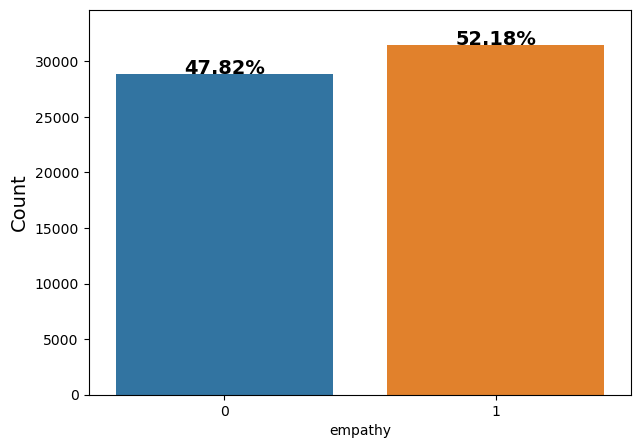

In [9]:
plot_class_frequencies(task_sac_features_aff_df)

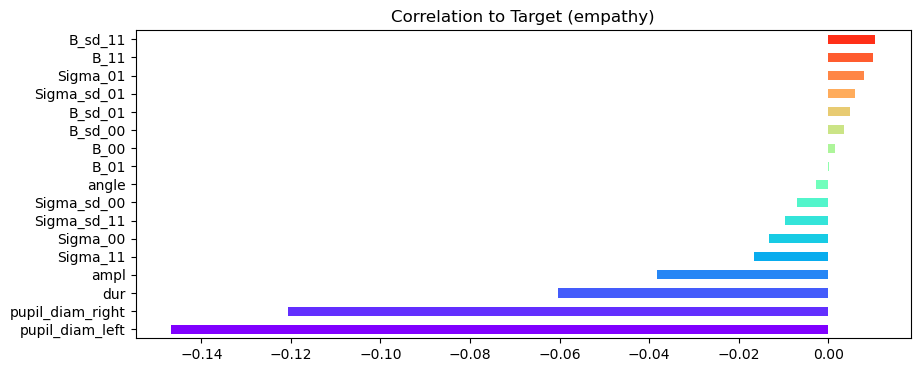


 B_sd_11             0.010548
B_11                0.010058
Sigma_01            0.007969
Sigma_sd_01         0.005952
B_sd_01             0.004819
B_sd_00             0.003607
B_00                0.001601
B_01                0.000091
angle              -0.002792
Sigma_sd_00        -0.006893
Sigma_sd_11        -0.009693
Sigma_00           -0.013159
Sigma_11           -0.016493
ampl               -0.038268
dur                -0.060320
pupil_diam_right   -0.120684
pupil_diam_left    -0.146815
dtype: float64


In [10]:
plot_correlations(task_sac_features_aff_df)